In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

### Part 4

This method starts the universe where the particle density is generated from a k^-3 distribution.

First, I run a large k^-3 distribution and plot slices of it to demonstrate that it is functional. Then I generate a smaller distribution the same size as the grid I will use for my nbody run.

The k^-3 distribution is normalized to a probability between 0 and 1

The first 

TO DO:
- draw masses from the distribution
- adjust code to deal with masses better / at all

Matthew says:
- generate FFT
- add gaussian noise
- create a density grid to randomly sample points from based on prob dist.

- create 3D grid with k^-3 dependence
- apply inverse fourier transform
- get density map with k^-3 spatial dependence


Steps mimicking Garret Goon:
https://garrettgoon.com/gaussian-fields/
QUOTE:
 A realization of a Gaussian random field with power spectrum can be created via the following steps:

    Start with a white noise field with unit amplitude 

obeying
.
Generate a position space realization of the white noise, denoted by
. That is, is a particular map showing the values of at various positions and for which
.
Fourier transform the realization:
.
Multiply
by the square root of the power spectrum to create
.
Fourier transform
back to positio space to get the desired realization: .

In [2]:
def power_dist(num, DEBUG=False):
        dx = np.arange(num)            
        #making it wrap around. stuff in same column/row/depth will have 0
        #previous wraps around to -1, next goes to 1
        dx[num//2:] = dx[num//2:]-num
        if DEBUG:
            print('dx before multiplication by 2pi/num is ', dx)
        dx = 2*np.pi/num*dx # how it's done in garrett goon

        #distances away from particle in x, y, z
        #particle lives at 0, 0, 0
        xmesh, ymesh, zmesh = np.meshgrid(dx,dx,dx)
        if DEBUG:
            mpl.imshow(xmesh[0, :, :], cmap='hot')
            mpl.title('xmesh x=0 2D slice')
            mpl.colorbar()
            mpl.show()  
            
            mpl.imshow(xmesh[:, 0, :], cmap='hot')
            mpl.title('xmesh y=0 2D slice')
            mpl.colorbar()
            mpl.show()
            
            mpl.imshow(xmesh[:, :, 0], cmap='hot')
            mpl.title('xmesh x=0 2D slice')
            mpl.colorbar()
            mpl.show()   
        
        dr = np.sqrt(xmesh**2 + ymesh**2 + zmesh**2)

        #point at 0,0,0 is 0 and will blow up
        dr[0, 0, 0] = 1 #temporarily make it one
        k_map = dr**(-3) #create the square root of the power distribution
        k_map[0, 0, 0] = 0 #was temporarily made 1 to not explode
        
        if DEBUG:
#             print('dr x = 0 is \n ', dr[0, :, :])
            mpl.imshow(dr[0, :, :], cmap='hot')
            mpl.title('dr x=0 2D slice')
            mpl.show()    
        
#             print('k_map x = 0 is \n ', k_map[0, :, :])
#             print('k_map x = 5 is \n,', k_map[5, :, :])
            mpl.imshow(k_map[0, :, :], cmap='hot')
            mpl.title('kmap x=0 2D slice')
            mpl.show()

        return k_map

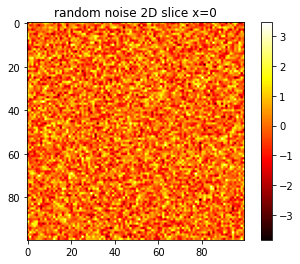

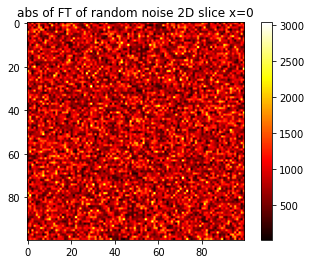

dx before multiplication by 2pi/num is  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 -50 -49 -48 -47
 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29
 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1]


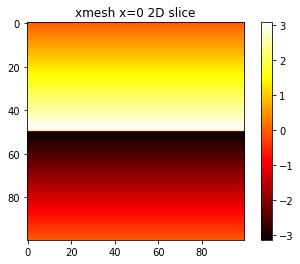

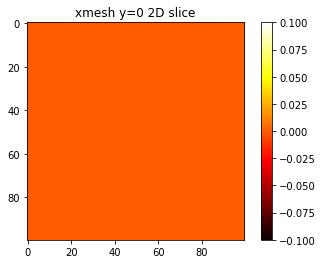

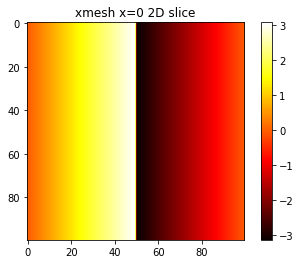

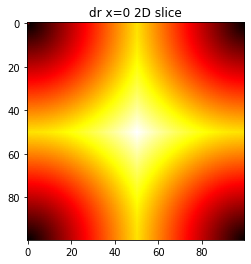

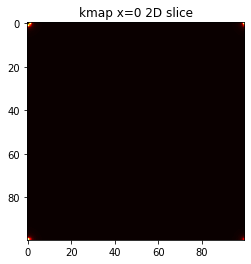

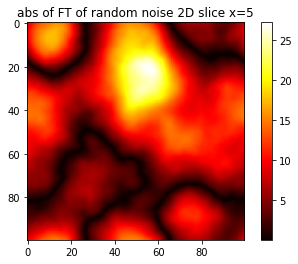

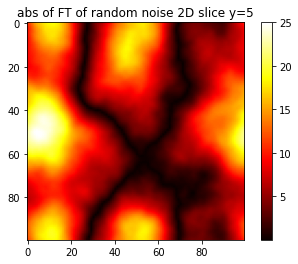

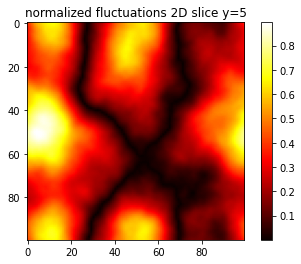

0

In [8]:
def generate_mass_fluctuations(num, DEBUG=False):
    
    #generate the intial power spectrum data
    norm_data = np.random.normal(size=(num, num, num))
#   norm_data = np.random.random((num, num, num))
    fft_dat = np.fft.fftn(norm_data)
    
    if DEBUG:
        mpl.figure()
        mpl.imshow(norm_data[0, :, :], cmap='hot')
        mpl.title('random noise 2D slice x=0')
        mpl.colorbar()
        mpl.show()

        mpl.figure()
        mpl.imshow(abs(fft_dat[0, :, :]), cmap='hot')
        mpl.title('abs of FT of random noise 2D slice x=0')
        mpl.colorbar()
        mpl.show()
        
        
    #get the power spectrum and multiply by the fourier space data
    pwr_spec = power_dist(num, DEBUG)
    
    fft_dat = fft_dat*pwr_spec
    dat = np.fft.ifftn(fft_dat)
    
    if DEBUG:
        mpl.figure()
        mpl.imshow(abs(dat[5, :, :]), cmap='hot')
        mpl.title('abs of FT of random noise 2D slice x=5')
        mpl.colorbar()
        mpl.show()
        
        mpl.figure()
        mpl.imshow(abs(dat[:, 5, :]), cmap='hot')
        mpl.title('abs of FT of random noise 2D slice y=5')
        mpl.colorbar()
        mpl.show()
        
    return dat
        
def generate_start_poisitions(num, DEBUG=False):
    #first get the mass fluctuation grid
    flucs = generate_mass_fluctuations(num, DEBUG)
    flucs/= np.max(flucs)
    
    mpl.imshow(abs(flucs[:, 5, :]), cmap='hot')
    mpl.title('normalized fluctuations 2D slice y=5')
    mpl.colorbar()
    mpl.show()

    return 0
    #scale to between 0 and 1 to use as probability
    
    
    
    
num = 100
generate_start_poisitions(num, DEBUG=True)


In [4]:
# num = 100
# power_dist(num, DEBUG=True)